In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [56]:
#Input
end_date = datetime.today()
start_date = end_date - timedelta(days = 365* 2)
ticker = 'NAB.AX'
df = yf.download(ticker, start=start_date, end=end_date )
df.describe()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
count,505.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02
mean,30.469129,30.663297,30.266634,30.483505,28.828624,4.863246e+06
std,2.715112,2.709820,2.692732,2.719893,3.225889,2.361801e+06
min,25.100000,25.325001,25.100000,25.160000,23.836664,0.000000e+00
25%,28.480000,28.690001,28.340000,28.559999,26.723894,3.421747e+06
50%,30.180000,30.350000,29.910000,30.190001,27.678371,4.263137e+06
75%,32.000000,32.150002,31.770000,32.060001,30.219429,5.747178e+06
max,37.880001,38.080002,37.619999,37.770000,37.770000,2.210401e+07


In [72]:
df.describe()
high = 35
low = 30

In [73]:
# As default, set everything to 0
df['Signal'] = 0
 
# If stock is more than 35, and we set the signal to -1 which means: 'short'
df.loc[df['Adj Close'] > high, 'Signal'] = -1
 
# If stock is less than 30, and we set the signal to 1 which means: 'long'
df.loc[df['Adj Close'] < low, 'Signal'] = 1

buys = df.loc[df['Signal'] == 1]
sells = df.loc[df['Signal'] == -1]

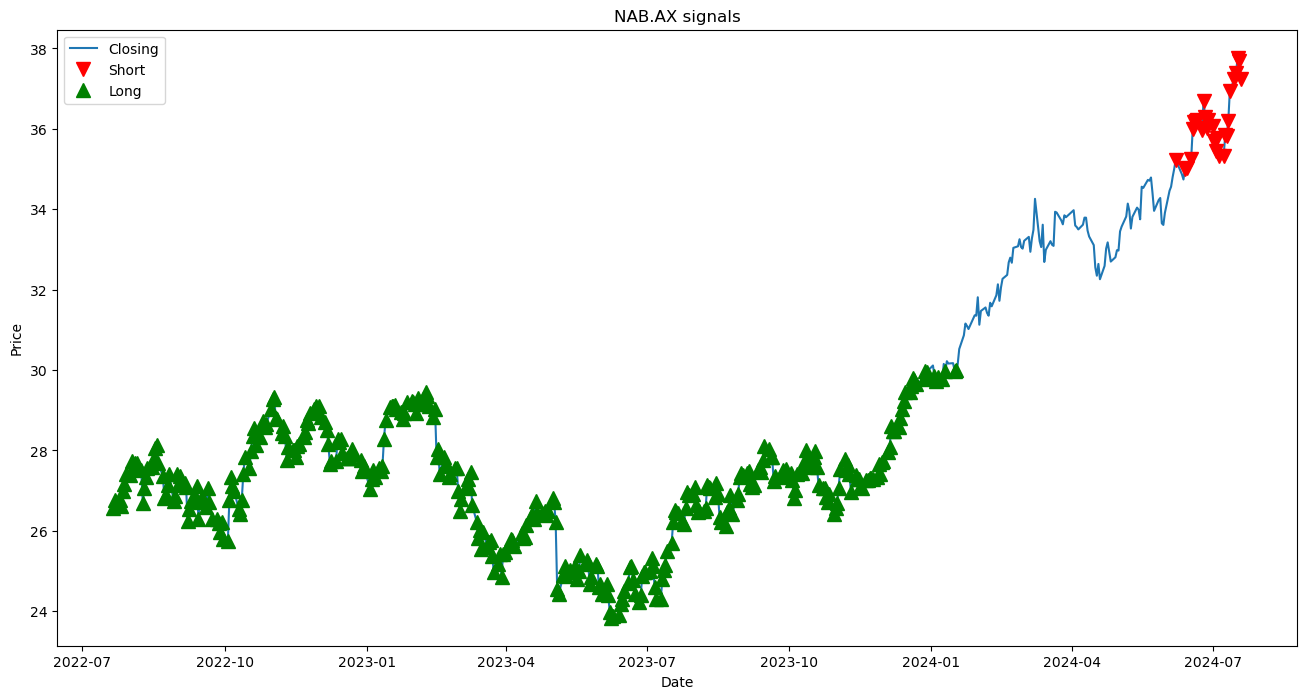

In [74]:
plt.figure(figsize=(16,8))
plt.plot(df.index, df['Adj Close'], label='Closing')
plt.plot(sells.index, df.loc[sells.index]['Adj Close'],'v', markersize=10, color='r', label='Short')
plt.plot(buys.index, df.loc[buys.index]['Adj Close'], '^', markersize=10, color='g', label='Long')
plt.title(ticker + ' signals')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(loc='best')
plt.show()